In [1]:
!pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=3e720b3dbda4419145cfee812c6e253f68dc9af19ec447eb3b6db2c8328c69d1
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [2]:
import pytrends
from datetime import datetime, timedelta
import pandas as pd
from pytrends.request import TrendReq


In [3]:
keyword = ["bitcoin"]

In [4]:
today = datetime.now()

In [5]:
# startdate = "2017-09-25"
startdate = "2017-09-25"

In [6]:
startdate = datetime.strptime(startdate, "%Y-%m-%d")
startdate

datetime.datetime(2017, 9, 25, 0, 0)

In [7]:
startdate + timedelta(days=5)

datetime.datetime(2017, 9, 30, 0, 0)

In [8]:
enddate = today.date()
enddate

datetime.date(2022, 5, 17)

In [9]:
enddate = datetime.today()
enddate

datetime.datetime(2022, 5, 17, 15, 7, 31, 114003)

In [10]:
timerange = str(startdate) + " " + str(enddate)
timerange

'2017-09-25 00:00:00 2022-05-17 15:07:31.114003'

In [11]:
result = pd.DataFrame()

In [12]:
pytrends = TrendReq()

In [13]:
df = pd.DataFrame()
df

""


In [14]:
import time

In [15]:
startdate = "2017-09-25"
startdate = datetime.strptime(startdate, "%Y-%m-%d") # 2017-09-25 00:00:00

df = pd.DataFrame()

while True:
  if startdate > datetime.today(): # 오늘 날짜 넘어가면 종료
    break

  temp_enddate = startdate + timedelta(days=7) # 
  timerange = str(startdate).split(" ")[0] + " " + str(temp_enddate).split(" ")[0]

  pytrends.build_payload(kw_list = keyword, timeframe = timerange)
  data = pytrends.interest_over_time()
  df = pd.concat([df, data])

  startdate = startdate + timedelta(days=8) # 
  time.sleep(0.5)
  print(df.tail(7))
df

            bitcoin  isPartial
date                          
2017-09-26       93      False
2017-09-27      100      False
2017-09-28       99      False
2017-09-29       91      False
2017-09-30       85      False
2017-10-01       81      False
2017-10-02       99      False
            bitcoin  isPartial
date                          
2017-10-04       75      False
2017-10-05       68      False
2017-10-06       67      False
2017-10-07       61      False
2017-10-08       67      False
2017-10-09       91      False
2017-10-10      100      False
            bitcoin  isPartial
date                          
2017-10-12       84      False
2017-10-13      100      False
2017-10-14       66      False
2017-10-15       61      False
2017-10-16       65      False
2017-10-17       62      False
2017-10-18       63      False
            bitcoin  isPartial
date                          
2017-10-20       87      False
2017-10-21       98      False
2017-10-22       77      False
2017-10-

,bitcoin,isPartial
date,,
2017-09-25,93,False
2017-09-26,93,False
2017-09-27,100,False
2017-09-28,99,False
2017-09-29,91,False
...,...,...
2022-05-11,65,False
2022-05-12,100,False
2022-05-13,77,False


In [16]:
df = df[:-1] # 맨 마지막행은 0이므로 제거 
df

,bitcoin,isPartial
date,,
2017-09-25,93,False
2017-09-26,93,False
2017-09-27,100,False
2017-09-28,99,False
2017-09-29,91,False
...,...,...
2022-05-10,61,False
2022-05-11,65,False
2022-05-12,100,False


In [17]:
df = df[["bitcoin"]] # 키워드 트렌드 지수만 남기기 
df

,bitcoin
date,
2017-09-25,93
2017-09-26,93
2017-09-27,100
2017-09-28,99
2017-09-29,91
...,...
2022-05-10,61
2022-05-11,65
2022-05-12,100


In [18]:
df = df.rename(columns={"date": "Date"})
df

,bitcoin
date,
2017-09-25,93
2017-09-26,93
2017-09-27,100
2017-09-28,99
2017-09-29,91
...,...
2022-05-10,61
2022-05-11,65
2022-05-12,100


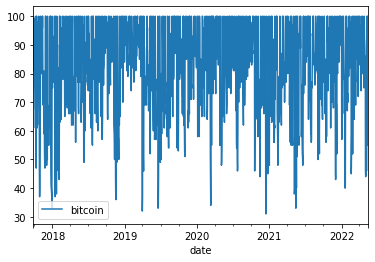

In [21]:
df.plot()

In [20]:
df.to_csv("bitcoin_trends.csv")